# Credit Card Users clustering in 4 clusters: 
## 1. Customers who are the active users of credit card.
## 2. Customers who never use credit card for installments.
## 3. Customers who use credit card for installment purpose.
## 4. Customers who use credit card for cash withdrawal

# Import Libraries...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load Data...

In [2]:
data = pd.read_csv("/kaggle/input/ccdata/CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Check for null data

In [3]:
nulldata = data.isnull().sum()
nulldata[nulldata>0]

CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64

# EDA

In [4]:
data.shape

(8950, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### "CUST_ID" is an object data type column, and there is no need of it in clustering, so we will drop it.

In [6]:
data = data.drop('CUST_ID',axis = 1)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### We will impute the null data with KNN Imputer, as it will eliminate the biasness in clustering. 

In [7]:
from sklearn.impute import KNNImputer
nullcolumns = data.columns[data.isnull().any()].to_list()
imputer = KNNImputer()
data_imp = pd.DataFrame(imputer.fit_transform(data[nullcolumns]),columns = nullcolumns)
data = data.fillna(data_imp)

### Now, there is no null data present in our dataset.

In [8]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Let's see the correlation between variables.

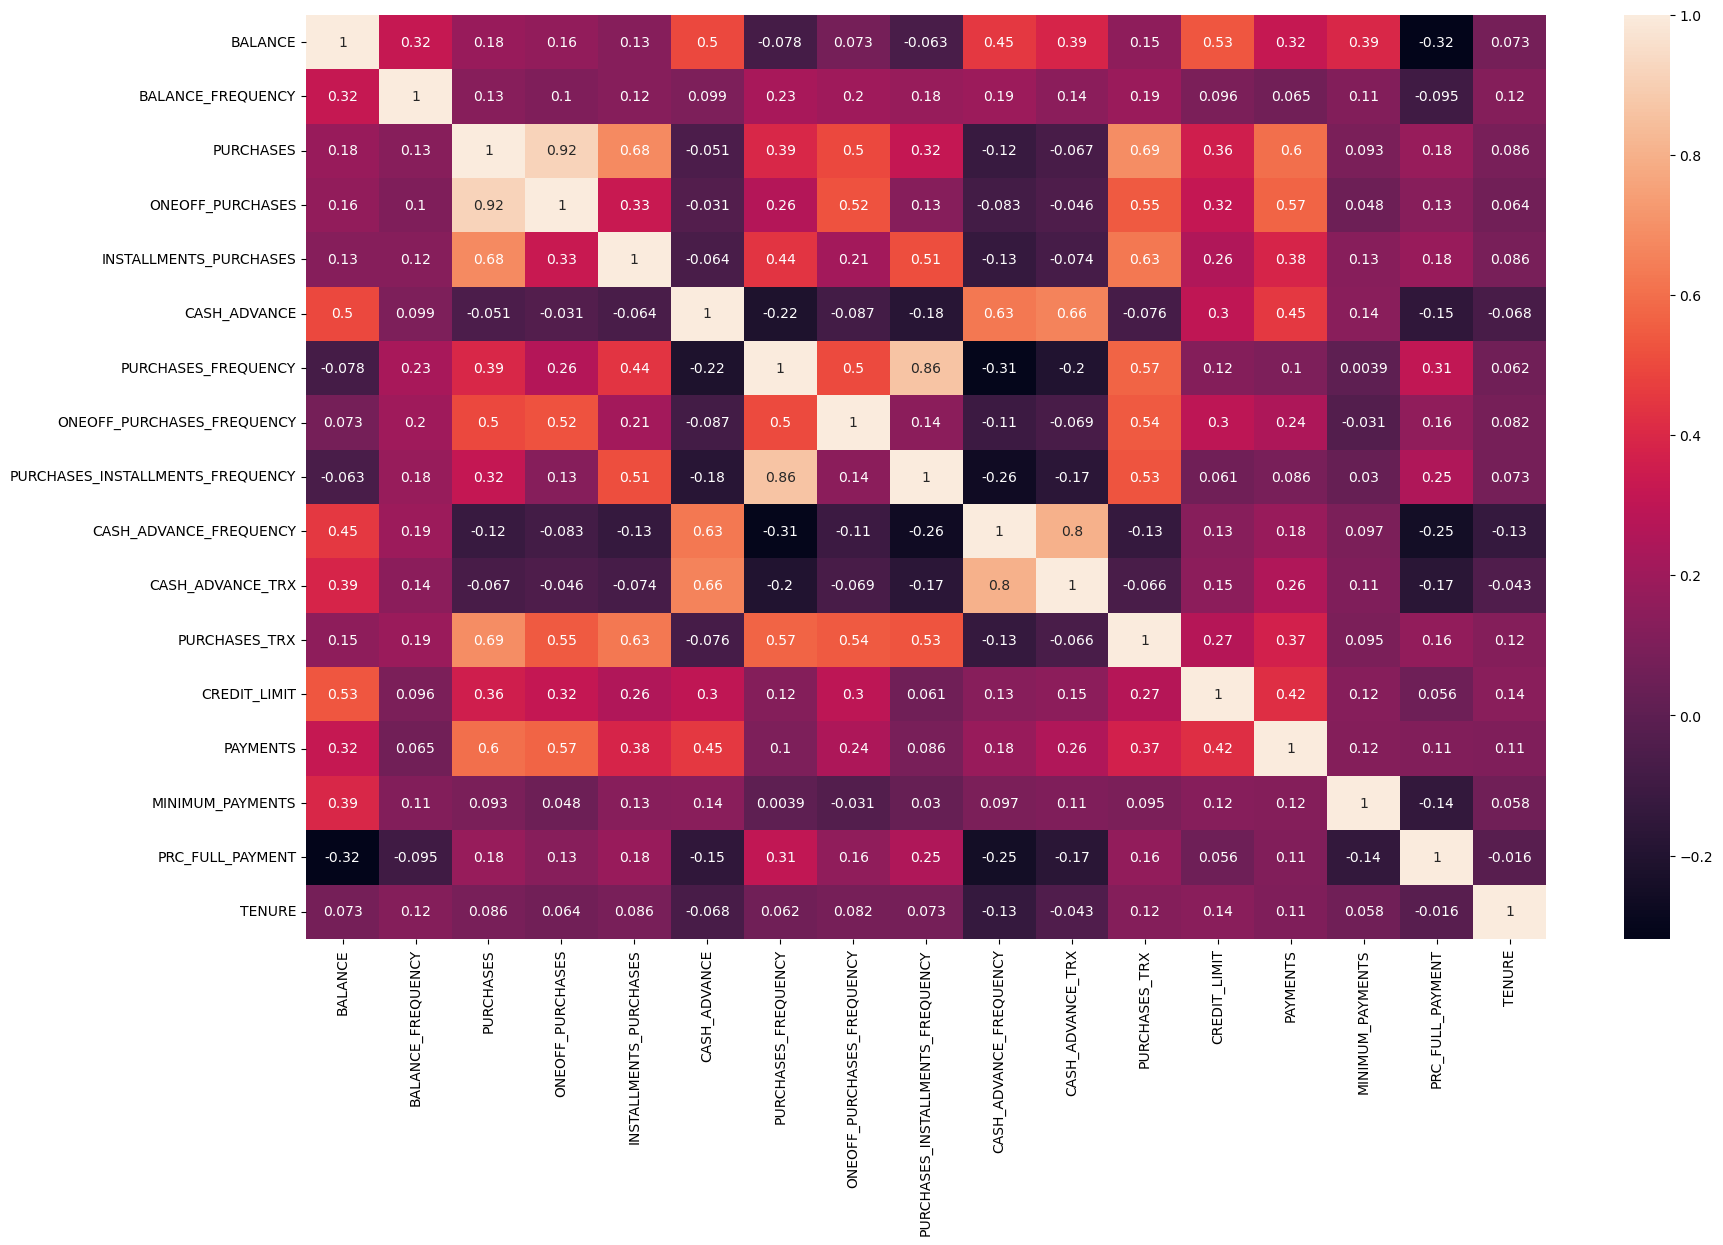

In [9]:
plt.subplots(figsize = (20,12))
sns.heatmap(data.corr(),annot = True)
plt.show()

### Relation between Purchases and Maximum amount of purchase in one go 

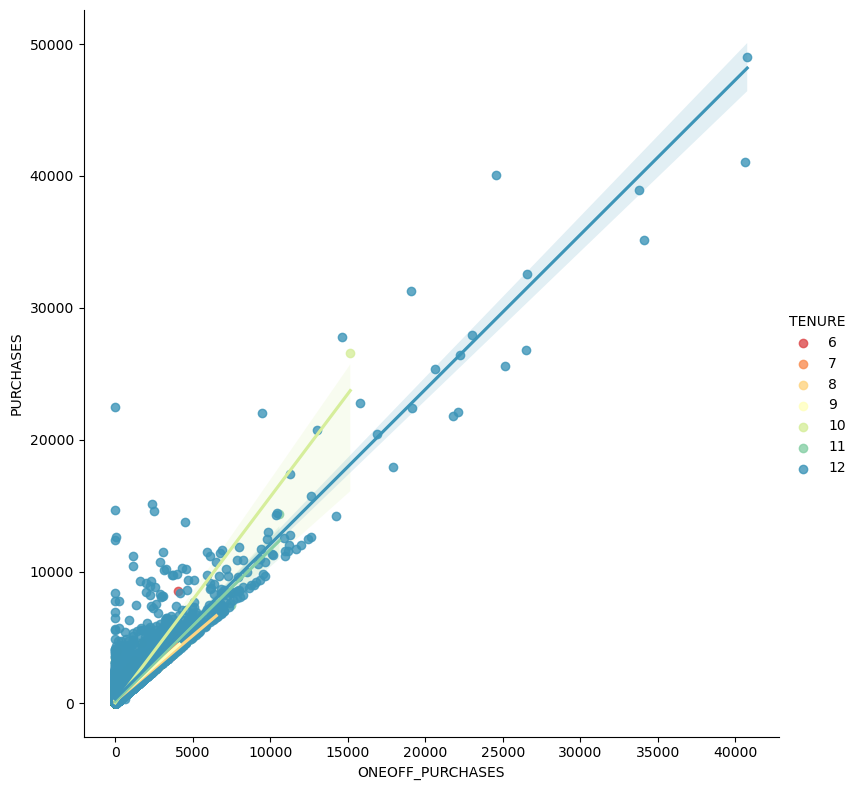

In [10]:
sns.lmplot(data, x = 'ONEOFF_PURCHASES', y = 'PURCHASES', hue = 'TENURE',palette = 'Spectral',height = 8)
plt.show()

### As, we saw from the correlation plot thath there is positive correlation between "CREDIT_LIMIT" and "BALANCE", and most credit card customers prefer 12 months tenure. Let's visualize it.

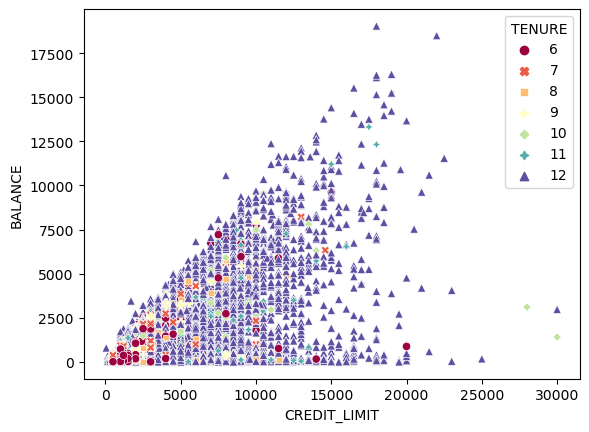

In [11]:
sns.scatterplot(data, x= 'CREDIT_LIMIT', y = 'BALANCE', hue = 'TENURE',palette = 'Spectral',style = 'TENURE',legend = 'full')
plt.show()

### Let's visualize the customers having purchase and total purchase transaction over different tenure. There is a +ve correlation between purchase and purchase transaction.

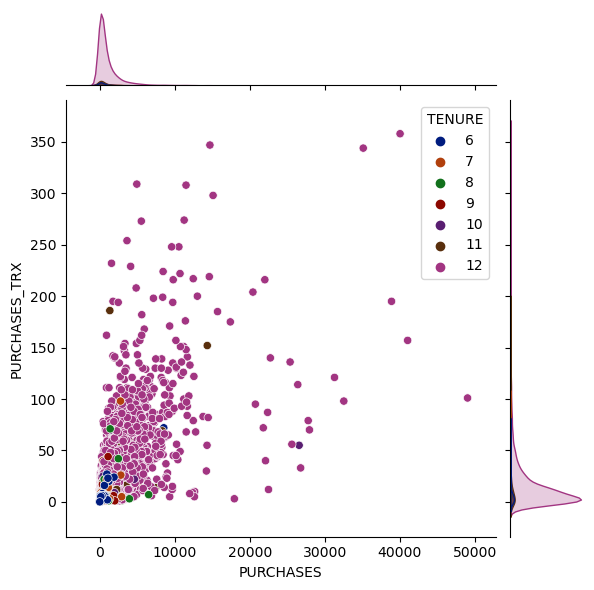

In [12]:
sns.jointplot(data,x='PURCHASES',y ='PURCHASES_TRX',hue = 'TENURE',palette = 'dark')
plt.show()

### There is no correlation between credit card and installment purchases over different tenure

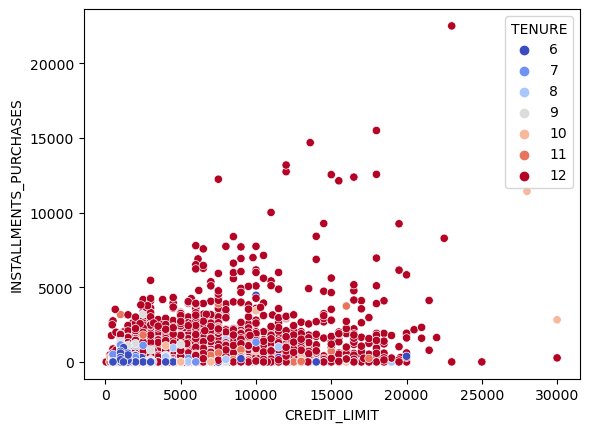

In [13]:
sns.scatterplot(data, x = 'CREDIT_LIMIT', y = 'INSTALLMENTS_PURCHASES', hue = 'TENURE', palette = 'coolwarm')
plt.show()

### Scaling the data

In [14]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = pd.DataFrame(scale.fit_transform(data))
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960383,-0.528979,-0.311729,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688676,0.818642,0.087047,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826098,-0.383805,-0.103210,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826098,-0.598688,0.148440,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905414,-0.364368,-0.266722,-0.525551,0.36068


In [15]:
pip install pyclustertend

Note: you may need to restart the kernel to use updated packages.


In [16]:
from pyclustertend import hopkins
from sklearn.preprocessing import scale

### Hopkins test tells that how much the data is clusterable. Results show that this dataset is highly clusterable. Here, hopkins score tends to zero, it means that data is not uniformly distributed.

In [17]:
hopkins(scale(X),X.shape[0])

0.03498716335829779

### Dimensionality reduction

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = pca.fit_transform(X)


### Visualizing that how many clusters can be made.

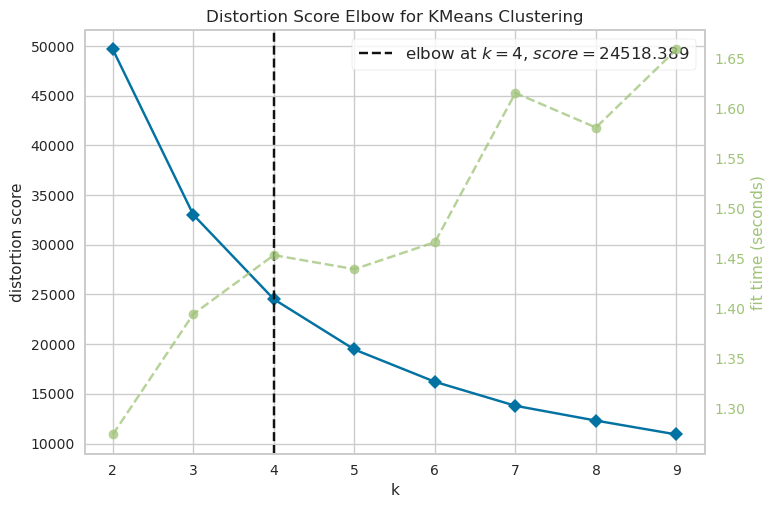

In [19]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k =(2,10))
visualizer.fit(X)
visualizer.show()
plt.show()

### Calinski Harabasz Score tells that how much data is dispersed between and within clusters.

In [20]:
from sklearn import metrics
metrics.calinski_harabasz_score(X,model.labels_)

6298.436320440341

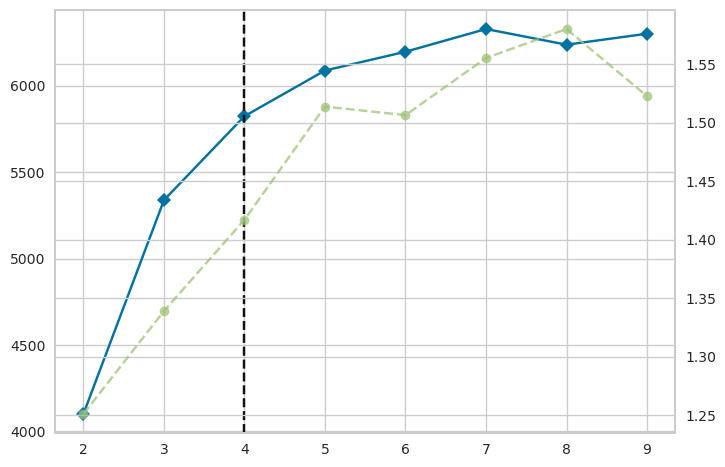

In [21]:
visualizer2 = KElbowVisualizer(model ,k=(2,10), metric='calinski_harabasz', timings = True,locate_elbow = True)
visualizer2.fit(X)
visualizer.show()
plt.show()

# Fitting the model

In [22]:
kmeans = KMeans(n_clusters = 4,random_state = 24, max_iter = 1000)
y_means = kmeans.fit_predict(X)

### Distortion Score

In [23]:
kmeans.inertia_

24518.423441485134

### Silhouette Score

In [24]:
from sklearn import metrics
metrics.silhouette_score(X,y_means)

0.4076614016143506

### Silhouette score computes the density of clusters

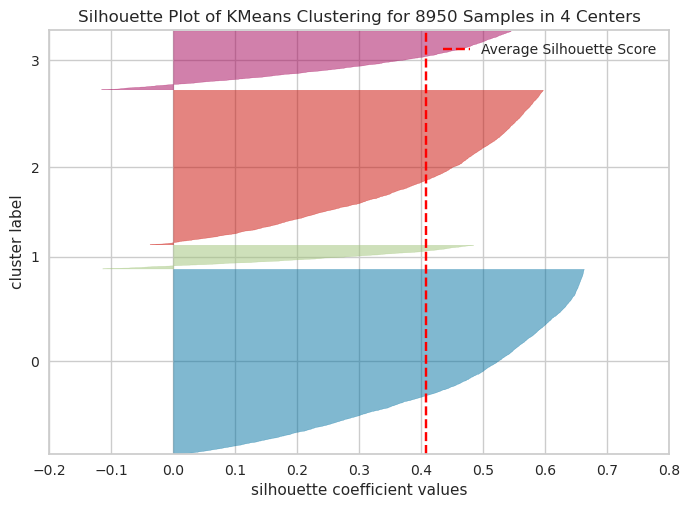

In [25]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer3 = SilhouetteVisualizer(kmeans, colors = 'yellowbrick')
visualizer3.fit(X)
visualizer3.show()
plt.show()

### It tells how better the clustering is. Minimum score is 0, it indicates better clustering. Here the result shows that cluster separation is less.

In [26]:
metrics.davies_bouldin_score(X,y_means)

0.8005904505534502

### Let's visualize inter cluster distance

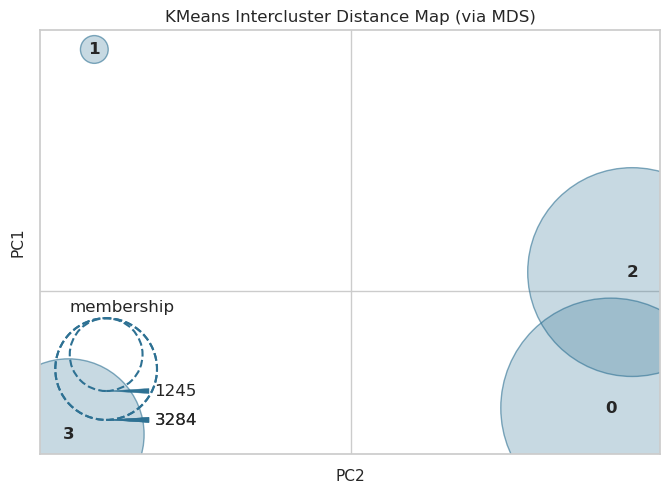

In [27]:
from yellowbrick.cluster import InterclusterDistance
visualizer4 = InterclusterDistance(kmeans)
visualizer4.fit(X)
visualizer4.show()
plt.show()

### Centroid of the clusters

In [28]:
centroid = kmeans.cluster_centers_
centroid

array([[-1.36294645, -0.19712806],
       [ 6.00165191,  0.6891412 ],
       [ 0.91354789, -1.16681931],
       [-0.53755574,  3.41964731]])

In [29]:
y_means = pd.DataFrame(index = y_means)
y_means = y_means.rename(index = {0:'Cluster 1',1:'Cluster 2',2:'Cluster 3',3:'Cluster 4'})
y_means.reset_index(level = 0,inplace = True)
y_means = y_means.rename(columns = {'index':'Labels'})
y_means.head(2)

,Labels
0,Cluster 1
1,Cluster 4


# Visualizing clusters

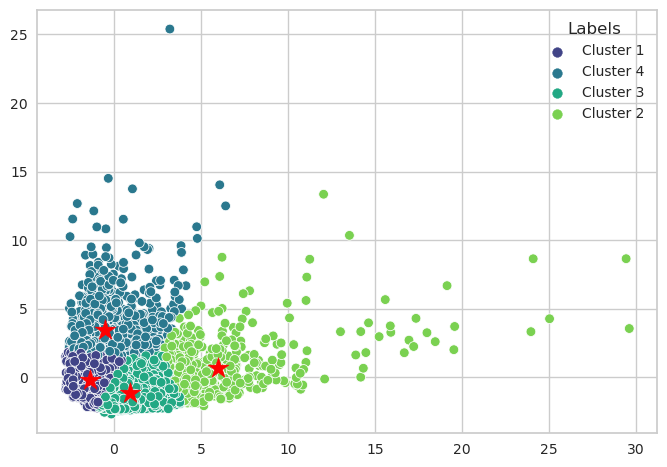

In [30]:
sns.scatterplot(data,x = X[:,0],y = X[:,1],hue = y_means['Labels'],palette = 'viridis')
plt.scatter(x = centroid[:,0],y =centroid[:,1],c='red',s = 250,marker='*')
plt.show() 